In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon
%matplotlib inline

In [2]:
uncorrected_data = pd.read_csv('../../delfi_data_cancer_detection/GC_correction_analysis/merge/merged_data/10000-sites_reformatted.uncorrected.exclusion_filtered.txt', sep='\t')
uncorrected_data = uncorrected_data[uncorrected_data['sample'].str.contains('Healthy')]
print('uncorrected:',len(uncorrected_data))

GC_corrected_data = pd.read_csv('../../delfi_data_cancer_detection/GC_correction_analysis/merge/merged_data/10000-sites_reformatted.GC_corrected.exclusion_filtered.txt', sep='\t')
GC_corrected_data = GC_corrected_data[GC_corrected_data['sample'].str.contains('Healthy')]
print('GC corrected:',len(GC_corrected_data))

uncorrected: 215
GC corrected: 215


In [3]:
features = GC_corrected_data.columns[(GC_corrected_data.columns.str.startswith('central_cov')) | (GC_corrected_data.columns.str.startswith('mean_cov')) | (GC_corrected_data.columns.str.startswith('amplitude'))]
site_names = list(features.str.rsplit('_',1,expand=True).droplevel().unique())
print(len(site_names))


377


In [4]:
#get MAD for GC corrected
MAD_dict = {}
for site_name in site_names:
    MAD_dict[site_name]={}
    for feature in ['central_coverage','mean_coverage','amplitude']:
        MAD = GC_corrected_data[feature+'_'+site_name].mad()
        MAD_dict[site_name][feature]=MAD


#get MAD for uncorrected
MAD_dict_uncorrected = {}
for site_name in site_names:
    MAD_dict_uncorrected[site_name]={}
    for feature in ['central_coverage','mean_coverage','amplitude']:
        MAD = uncorrected_data[feature+'_'+site_name].mad()
        MAD_dict_uncorrected[site_name][feature]=MAD


In [5]:
MAD_df = pd.DataFrame(MAD_dict).T
MAD_df_uncorrected = pd.DataFrame(MAD_dict_uncorrected).T

In [6]:
merged = MAD_df_uncorrected.merge(MAD_df, left_index=True, right_index=True, suffixes=['_MAD_uncorrected','_MAD_GC_corrected'])

WilcoxonResult(statistic=466.0, pvalue=6.283663695496618e-62)
number decreased RMSE: 365
fraction decreased RMSE: 0.9681697612732095


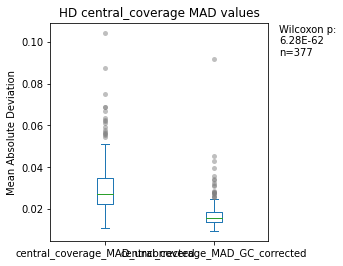

In [7]:
#boxplot for central coverage
feature = 'central_coverage'
fig,ax = plt.subplots(1, figsize=(5,3.8))
ax.set_title('HD '+feature+' MAD values')
merged[[feature+'_MAD_uncorrected',feature+'_MAD_GC_corrected']].plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
ax.set_ylabel('Mean Absolute Deviation')
plt.tight_layout()
stat,wilcoxon_pval = wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected'])
plt.text(1.05,.85, 'Wilcoxon p:\n'+'{:.2E}'.format(wilcoxon_pval)+'\nn='+str(len(merged)), transform=ax.transAxes)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.tight_layout()
plt.savefig('plots/HD_MAD_'+feature+'_boxplot.pdf')

print(wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected']))
number_decreased = sum(merged[feature+'_MAD_uncorrected']>merged[feature+'_MAD_GC_corrected'])
print("number decreased RMSE:",number_decreased)
print("fraction decreased RMSE:",number_decreased/len(merged))


WilcoxonResult(statistic=56.0, pvalue=2.4464026299439186e-63)
number decreased RMSE: 372
fraction decreased RMSE: 0.986737400530504


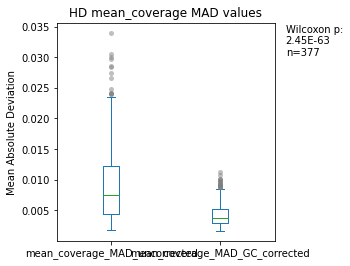

In [8]:
#boxplot for mean coverage
feature = 'mean_coverage'
fig,ax = plt.subplots(1, figsize=(5,3.8))
ax.set_title('HD '+feature+' MAD values')
merged[[feature+'_MAD_uncorrected',feature+'_MAD_GC_corrected']].plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
ax.set_ylabel('Mean Absolute Deviation')
plt.tight_layout()
stat,wilcoxon_pval = wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected'])
plt.text(1.05,.85, 'Wilcoxon p:\n'+'{:.2E}'.format(wilcoxon_pval)+'\nn='+str(len(merged)), transform=ax.transAxes)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.tight_layout()
plt.savefig('plots/HD_MAD_'+feature+'_boxplot.pdf')

print(wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected']))
number_decreased = sum(merged[feature+'_MAD_uncorrected']>merged[feature+'_MAD_GC_corrected'])
print("number decreased RMSE:",number_decreased)
print("fraction decreased RMSE:",number_decreased/len(merged))


WilcoxonResult(statistic=13196.0, pvalue=3.1816968294749705e-26)
number decreased RMSE: 89
fraction decreased RMSE: 0.23607427055702918
medians
amplitude_MAD_uncorrected     0.141061
amplitude_MAD_GC_corrected    0.147555
dtype: float64


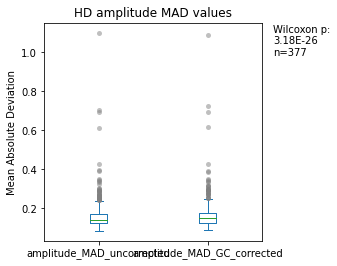

In [9]:
#boxplot for amplitude
feature = 'amplitude'
fig,ax = plt.subplots(1, figsize=(5,3.8))
ax.set_title('HD '+feature+' MAD values')
merged[[feature+'_MAD_uncorrected',feature+'_MAD_GC_corrected']].plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
ax.set_ylabel('Mean Absolute Deviation')
plt.tight_layout()
stat,wilcoxon_pval = wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected'])
plt.text(1.05,.85, 'Wilcoxon p:\n'+'{:.2E}'.format(wilcoxon_pval)+'\nn='+str(len(merged)), transform=ax.transAxes)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.tight_layout()
plt.savefig('plots/HD_MAD_'+feature+'_boxplot.pdf')

print(wilcoxon(merged[feature+'_MAD_uncorrected'],merged[feature+'_MAD_GC_corrected']))
number_decreased = sum(merged[feature+'_MAD_uncorrected']>merged[feature+'_MAD_GC_corrected'])
print("number decreased RMSE:",number_decreased)
print("fraction decreased RMSE:",number_decreased/len(merged))
print('medians')
print(merged[[feature+'_MAD_uncorrected',feature+'_MAD_GC_corrected']].median())

In [10]:
new_col_order = ['central_coverage_MAD_uncorrected', 'central_coverage_MAD_GC_corrected',
 'mean_coverage_MAD_uncorrected','mean_coverage_MAD_GC_corrected',
 'amplitude_MAD_uncorrected', 'amplitude_MAD_GC_corrected']


In [11]:
to_export = merged.reset_index().rename(columns = {'index':'site_name'}).set_index('site_name')[new_col_order]
to_export.to_csv('files/S5_HD_MAD_scores.tsv',sep='\t')

In [12]:
to_export.head()

,central_coverage_MAD_uncorrected,central_coverage_MAD_GC_corrected,mean_coverage_MAD_uncorrected,mean_coverage_MAD_GC_corrected,amplitude_MAD_uncorrected,amplitude_MAD_GC_corrected
site_name,,,,,,
AHR.hg38.10000,0.024158,0.013190,0.004777,0.002934,0.108826,0.107020
AR.hg38.10000,0.014957,0.013949,0.003158,0.002509,0.128204,0.135112
ARID3A.hg38.10000,0.018018,0.014871,0.003213,0.003034,0.107158,0.108412
ARNT.hg38.10000,0.024509,0.014544,0.009507,0.003937,0.105568,0.114174
ARNTL.hg38.10000,0.049790,0.015695,0.008048,0.003437,0.127453,0.138582
